In [60]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt

In [2]:
zf = zipfile.ZipFile('../content/anonymisedData.zip') 
student_vle = pd.read_csv(zf.open('studentVle.csv'))
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [39]:
vle_group = student_vle.groupby(by = ['code_module',
                                      'code_presentation',
                                      'id_student',
                                     'date'])

sum_clicks = vle_group['sum_click'].sum().reset_index()

sum_activities = vle_group['id_site'].count().reset_index()
sum_activities['sum_clicks'] = sum_clicks['sum_click']

daily_activities = sum_activities.rename(columns = {'id_site':'sum_activities'})
daily_activities

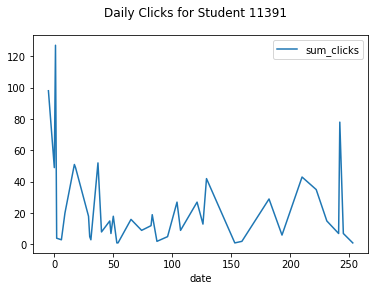

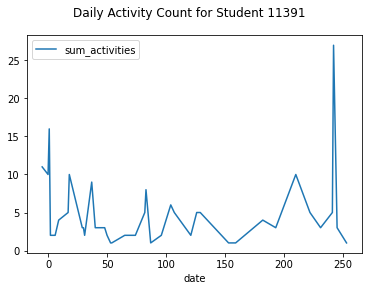

In [63]:
student = 11391
daily_activities.loc[(daily_activities['id_student'] == student)
                    & (daily_activities['code_module'] == 'AAA')
                    &(daily_activities['code_presentation'] == '2013J')].plot(
x = 'date', y='sum_clicks')
plt.suptitle(f'Daily Clicks for Student {student}')
plt.show()
daily_activities.loc[(daily_activities['id_student'] == 11391)
                    & (daily_activities['code_module'] == 'AAA')
                    &(daily_activities['code_presentation'] == '2013J')].plot(
x = 'date', y='sum_activities')
plt.suptitle(f'Daily Activity Count for Student {student}')
plt.show()

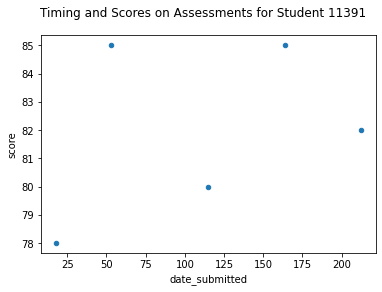

In [65]:
assessments = pd.read_csv(zf.open('studentAssessment.csv'), skiprows=[128223,64073])

assess_groups = assessments.groupby(by=['id_student', 'date_submitted'])

assessment_timing = assess_groups.mean().reset_index().drop(columns = ['is_banked','id_assessment'])

assessment_timing.loc[assessment_timing['id_student'] == student].plot(
    x='date_submitted', y='score', kind='scatter')
plt.suptitle(f'Timing and Scores on Assessments for Student {student}')
plt.show()